# K-means

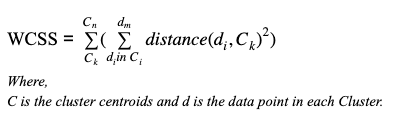

WCSS = Within-Cluster Sum of Square


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = dataset.iloc[:, [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import KMeans

In [7]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)    

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

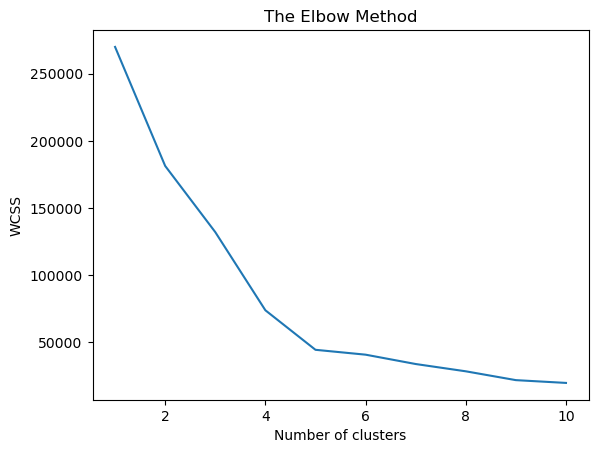

In [8]:
plt.plot(range(1, 11), WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(x)


C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


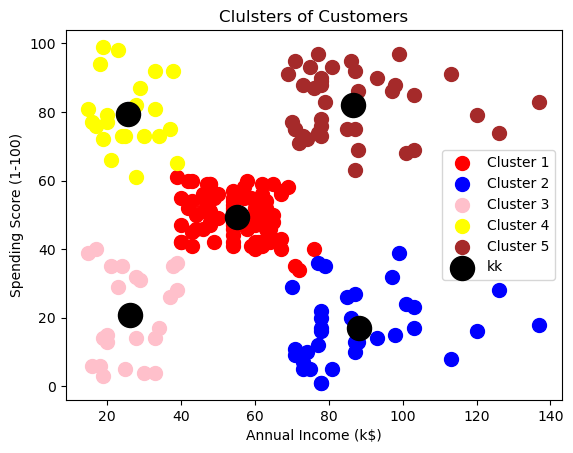

In [10]:
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = "red", label = 'Cluster 1')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = "blue", label = 'Cluster 1')
# ...
colors = ['red', 'blue', 'pink', 'yellow', 'brown']
for i in range(5):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 100, c = colors[i], label = f'Cluster {i + 1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'kk')
plt.title("Clulsters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Clustering Heraquico

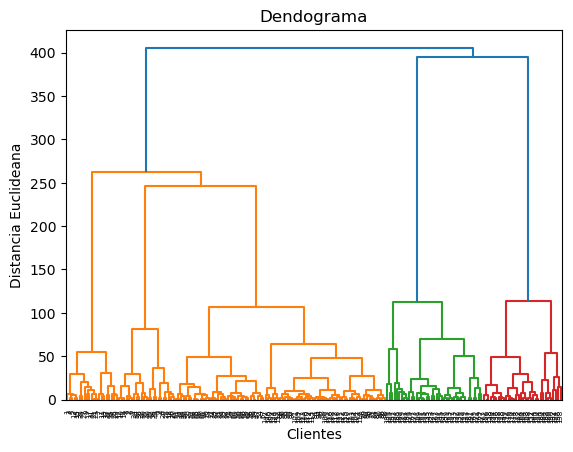

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendograma = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclideana')
plt.show()




In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)


C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


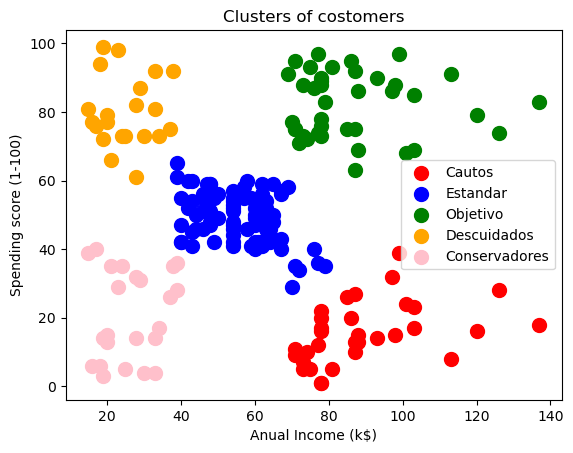

In [12]:
# Plot clusters
plt.scatter(x[y_hc ==0, 0], x[y_hc==0, 1], s=100, c='red', label='Cautos')
plt.scatter(x[y_hc ==1, 0], x[y_hc==1, 1], s=100, c='blue', label='Estandar')
plt.scatter(x[y_hc ==2, 0], x[y_hc==2, 1], s=100, c='green', label='Objetivo')
plt.scatter(x[y_hc ==3, 0], x[y_hc==3, 1], s=100, c='orange', label='Descuidados')
plt.scatter(x[y_hc ==4, 0], x[y_hc==4, 1], s=100, c='pink', label='Conservadores')
plt.title("Clusters of costomers")
plt.xlabel("Anual Income (k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show()

## Medir con metricas

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
